# Install Required Tools for Data Analysis using Python

In [1]:
pip install pandas numpy matplotlib seaborn openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Display settings

In [3]:
pd.set_option("display.max_columns", None)
plt.rcParams["figure.figsize"] = (8,5)

## Load the Dataset

In [4]:
df=pd.read_excel("laptop_battery_health_usage.xlsx")

## Check first rows

In [5]:
df.head()

,デバイスID,ブランド,モデル年（発売年）,os,使用用途（利用タイプ）,1日あたりの使用時間（時間）,充電サイクル回数,平均充電上限（%）,バッテリー健康度（%）,バッテリー経過月数（か月）,過熱問題の有無,性能評価（レーティング）
0,LB001,HP,2021,Windows,Office,6,420,90,86,36,No,4
1,LB002,Dell,2020,Windows,Programming,8,610,100,78,48,Yes,3
2,LB003,Apple,2022,macOS,Creative,7,310,85,92,24,No,5
3,LB004,Lenovo,2019,Windows,Student,5,700,100,70,60,Yes,3
4,LB005,Asus,2021,Windows,Gaming,9,820,100,65,40,Yes,2


## Understand the Dataset
 Shape (rows & columns)

In [6]:
df.shape

(50, 12)

## Column names

In [8]:
df.columns

Index(['デバイスID', 'ブランド', 'モデル年（発売年）', 'os', '使用用途（利用タイプ）', '1日あたりの使用時間（時間）',
       '充電サイクル回数', '平均充電上限（%）', 'バッテリー健康度（%）', 'バッテリー経過月数（か月）', '過熱問題の有無',
       '性能評価（レーティング）'],
      dtype='object')

## Data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   デバイスID          50 non-null     object
 1   ブランド            50 non-null     object
 2   モデル年（発売年）       50 non-null     int64 
 3   os              50 non-null     object
 4   使用用途（利用タイプ）     50 non-null     object
 5   1日あたりの使用時間（時間）  50 non-null     int64 
 6   充電サイクル回数        50 non-null     int64 
 7   平均充電上限（%）       50 non-null     int64 
 8   バッテリー健康度（%）     50 non-null     int64 
 9   バッテリー経過月数（か月）   50 non-null     int64 
 10  過熱問題の有無         50 non-null     object
 11  性能評価（レーティング）    50 non-null     int64 
dtypes: int64(7), object(5)
memory usage: 4.8+ KB


## Basic statistics

In [10]:
df.describe()

,モデル年（発売年）,1日あたりの使用時間（時間）,充電サイクル回数,平均充電上限（%）,バッテリー健康度（%）,バッテリー経過月数（か月）,性能評価（レーティング）
count,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,2020.560000,6.600000,526.400000,92.100000,80.16000,42.240000,3.580000
std,1.567007,1.498298,220.405563,6.857887,11.83278,18.118161,1.144463
min,2018.000000,4.000000,180.000000,80.000000,55.00000,12.000000,1.000000
25%,2019.250000,6.000000,342.500000,85.000000,72.50000,25.500000,3.000000
50%,2021.000000,6.000000,495.000000,90.000000,82.50000,38.000000,4.000000
75%,2022.000000,8.000000,695.000000,100.000000,90.00000,58.500000,4.750000
max,2023.000000,10.000000,950.000000,100.000000,98.00000,72.000000,5.000000


## Data Cleaning (Basic)
 Check missing values

In [11]:
df.isnull().sum()

デバイスID            0
ブランド              0
モデル年（発売年）         0
os                0
使用用途（利用タイプ）       0
1日あたりの使用時間（時間）    0
充電サイクル回数          0
平均充電上限（%）         0
バッテリー健康度（%）       0
バッテリー経過月数（か月）     0
過熱問題の有無           0
性能評価（レーティング）      0
dtype: int64

## Convert categorical values (optional)

In [12]:
df["過熱問題の有無"] = df["過熱問題の有無"].map({"Yes": 1, "No": 0})

## Exploratory Data Analysis (EDA)
1 Average Battery Health

In [13]:
df["バッテリー健康度（%）"].mean()

80.16

## 2 Battery Health by Usage Type

In [14]:
df.groupby("使用用途（利用タイプ）")["バッテリー健康度（%）"].mean()


使用用途（利用タイプ）
Creative       85.800000
Gaming         64.500000
Office         81.823529
Programming    87.500000
Student        75.100000
Name: バッテリー健康度（%）, dtype: float64

### 3 Battery Health by Brand

In [15]:
df.groupby("ブランド")["バッテリー健康度（%）"].mean().sort_values(ascending=False)

ブランド
Apple     89.555556
Dell      80.875000
HP        80.777778
Acer      79.250000
Lenovo    79.125000
Asus      70.125000
Name: バッテリー健康度（%）, dtype: float64

## Visualization (Very Important)
1 Charging Cycles vs Battery Health

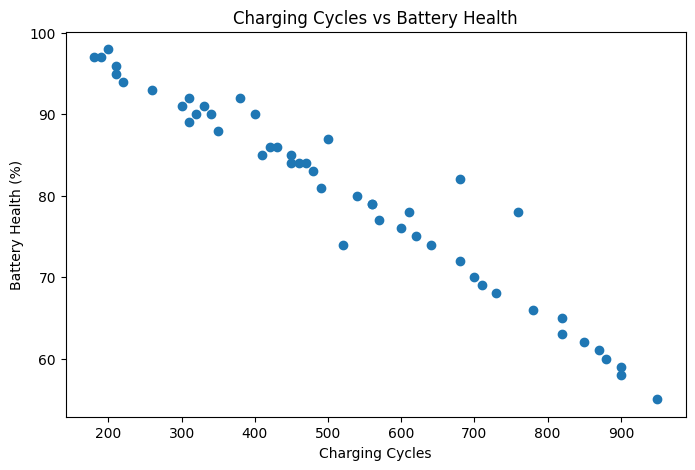

In [16]:
plt.scatter(df["充電サイクル回数"], df["バッテリー健康度（%）"])
plt.xlabel("Charging Cycles")
plt.ylabel("Battery Health (%)")
plt.title("Charging Cycles vs Battery Health")
plt.show()

### .2 Battery Age vs Battery Health

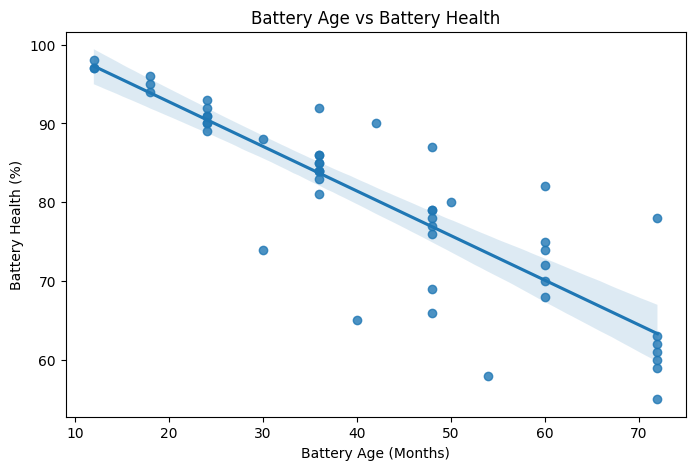

In [17]:
sns.regplot(
    x=df["バッテリー経過月数（か月）"],
    y=df["バッテリー健康度（%）"]
)
plt.xlabel("Battery Age (Months)")
plt.ylabel("Battery Health (%)")
plt.title("Battery Age vs Battery Health")
plt.show()


### .3 Overheating Impact

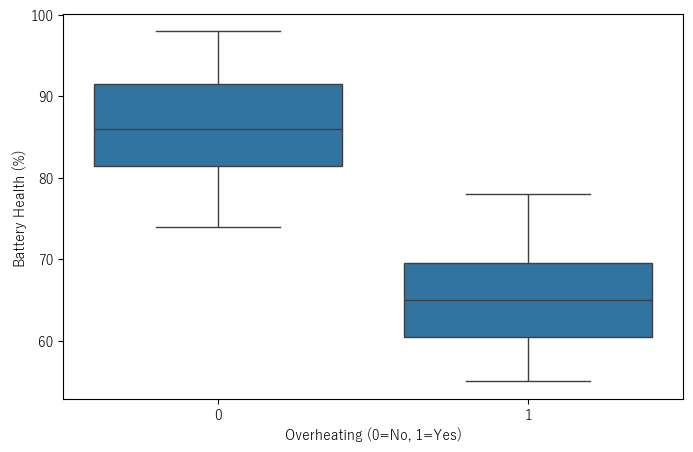

In [24]:
sns.boxplot(
    x=df["過熱問題の有無"],
    y=df["バッテリー健康度（%）"]
)
plt.xlabel("Overheating (0=No, 1=Yes)")
plt.ylabel("Battery Health (%)")
plt.show()


## Correlation Analysis

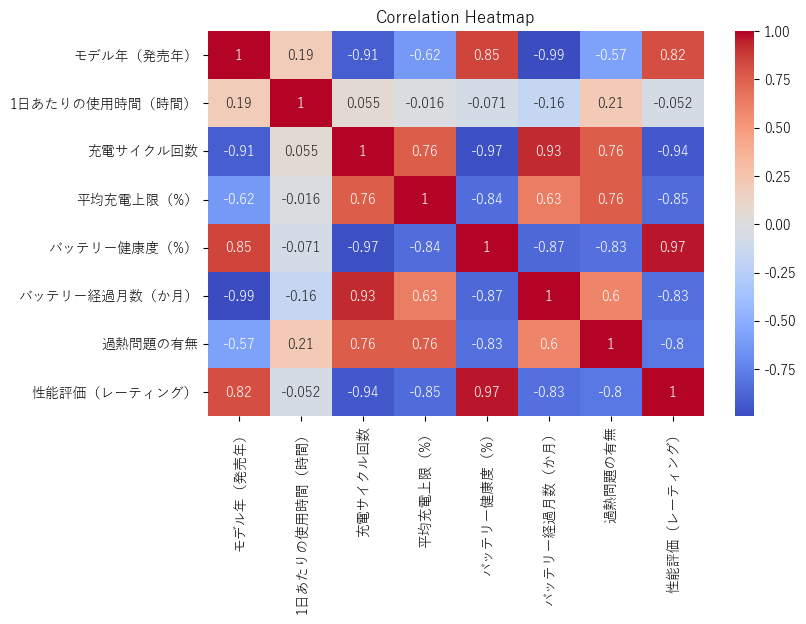

In [23]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [20]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Yu Gothic'
plt.rcParams['axes.unicode_minus'] = False


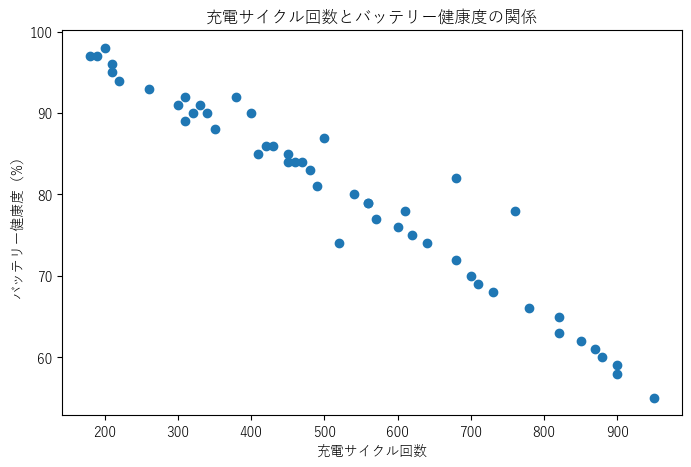

In [21]:
plt.scatter(
    df["充電サイクル回数"],
    df["バッテリー健康度（%）"]
)
plt.xlabel("充電サイクル回数")
plt.ylabel("バッテリー健康度（%）")
plt.title("充電サイクル回数とバッテリー健康度の関係")
plt.show()


# Japanese fonts Installation 

In [22]:
pip install japanize-matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/4.1 MB ? eta -:--:--
     -- ------------------------------------- 0.3/4.1 MB ? eta -:--:--
     -- ------------------------------------- 0.3/4.1 MB ? eta -:--:--
     -- ------------------------------------- 0.3/4.1 MB ? eta -:--:--
     -- ------------------------------------- 0.3/4.1 MB ? eta -:--:--
     -- ------------------------------------- 0.3/4.1 MB ? eta -:--:--
     -- ------------------------------------- 0.3/4.1 MB ? eta -:--:--
     ----- ---------------------------------- 0.5/4.1 MB 207.1 kB/s eta 0:00:18
     ------- -------------------------------- 0.8/4.1 MB 349.5 kB/s eta 0:00:10
     ------------ --------------------------- 1.3/4.1 MB 639.0 kB/s eta 0:00:05
     --------------- ------------------------ 1.6/4.1 MB 742.2 kB/s eta 0:00:04
     --------------- ------------------------ 1.6/4.1 MB 742.2 kB/s eta 0:00:04
     -------------------- ------------------- 2.1/4.1 MB 782.9 kB/s eta 0:00:03
     ------------------